## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [2]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv(r'C:\Users\The Godfather\Desktop\Udacity\Starbucks Portfolio Project/training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [5]:
train_data.shape

(84534, 10)

In [11]:
#checking for missing data in each culumn
train_data.isnull().mean()

ID           0.0
Promotion    0.0
purchase     0.0
V1           0.0
V2           0.0
V3           0.0
V4           0.0
V5           0.0
V6           0.0
V7           0.0
dtype: float64

In [4]:
#load in the test data
test_data = pd.read_csv(r'C:\Users\The Godfather\Desktop\Udacity\Starbucks Portfolio Project/Test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [6]:
test_data.shape

(41650, 10)

In [10]:
test_data.isnull().mean()

ID           0.0
Promotion    0.0
purchase     0.0
V1           0.0
V2           0.0
V3           0.0
V4           0.0
V5           0.0
V6           0.0
V7           0.0
dtype: float64

#### 1. Lets look at the distribution of training and testing datasets
Goal is to see the distribution of features in general and compare the features for different combinations of promotion (given vs not-given) and product purchased (yes vs no).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D8B88F7F0>,
      dtype=object)

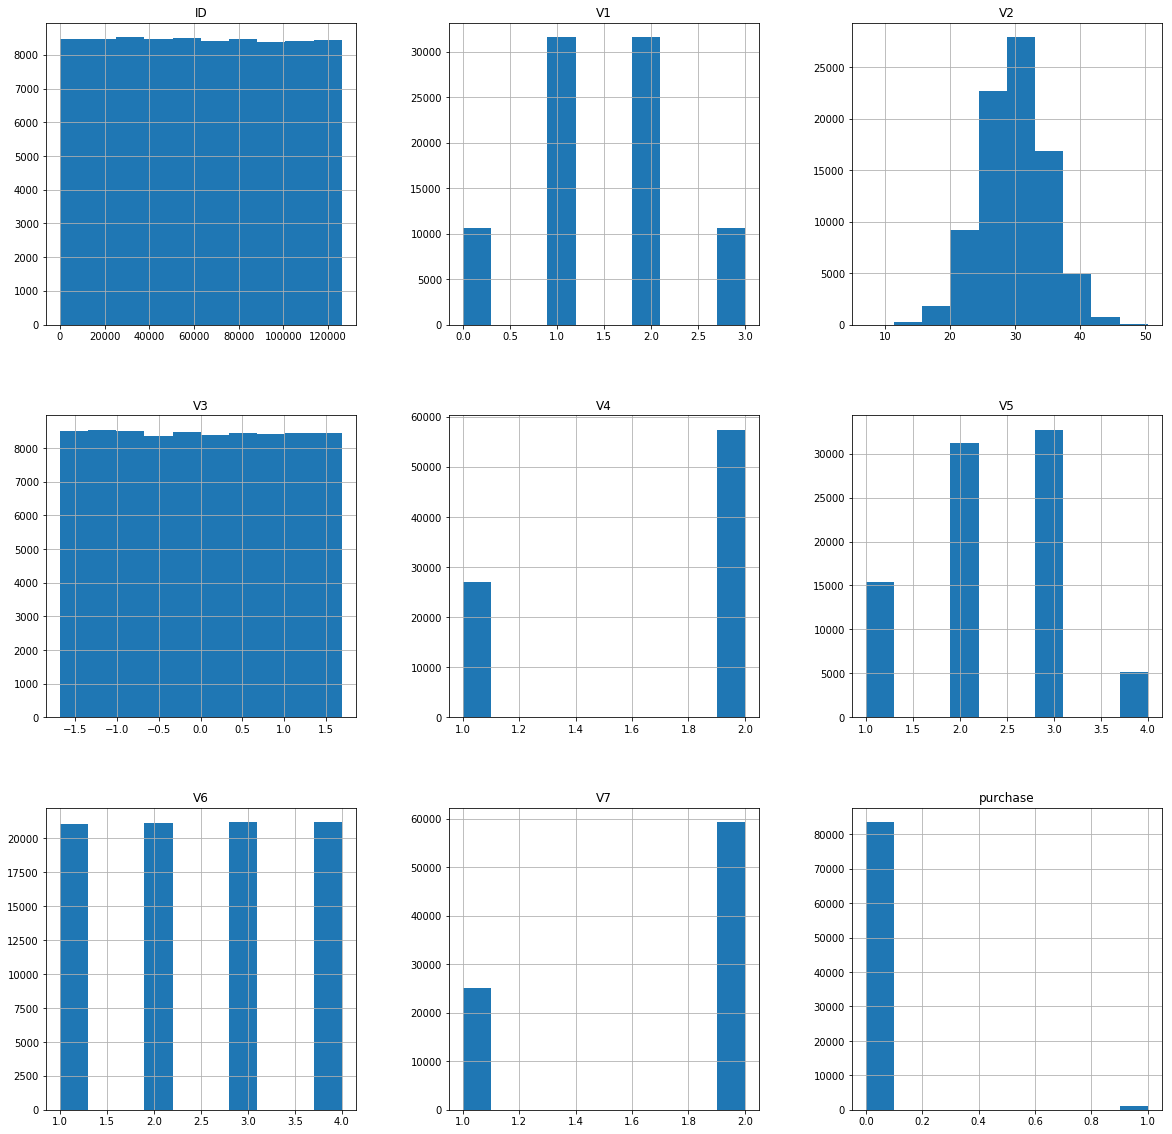

In [14]:
# 1.1 Lets look at Training data distriutions for features
train_data.hist(figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D8B88F0F0>,
      dtype=object)

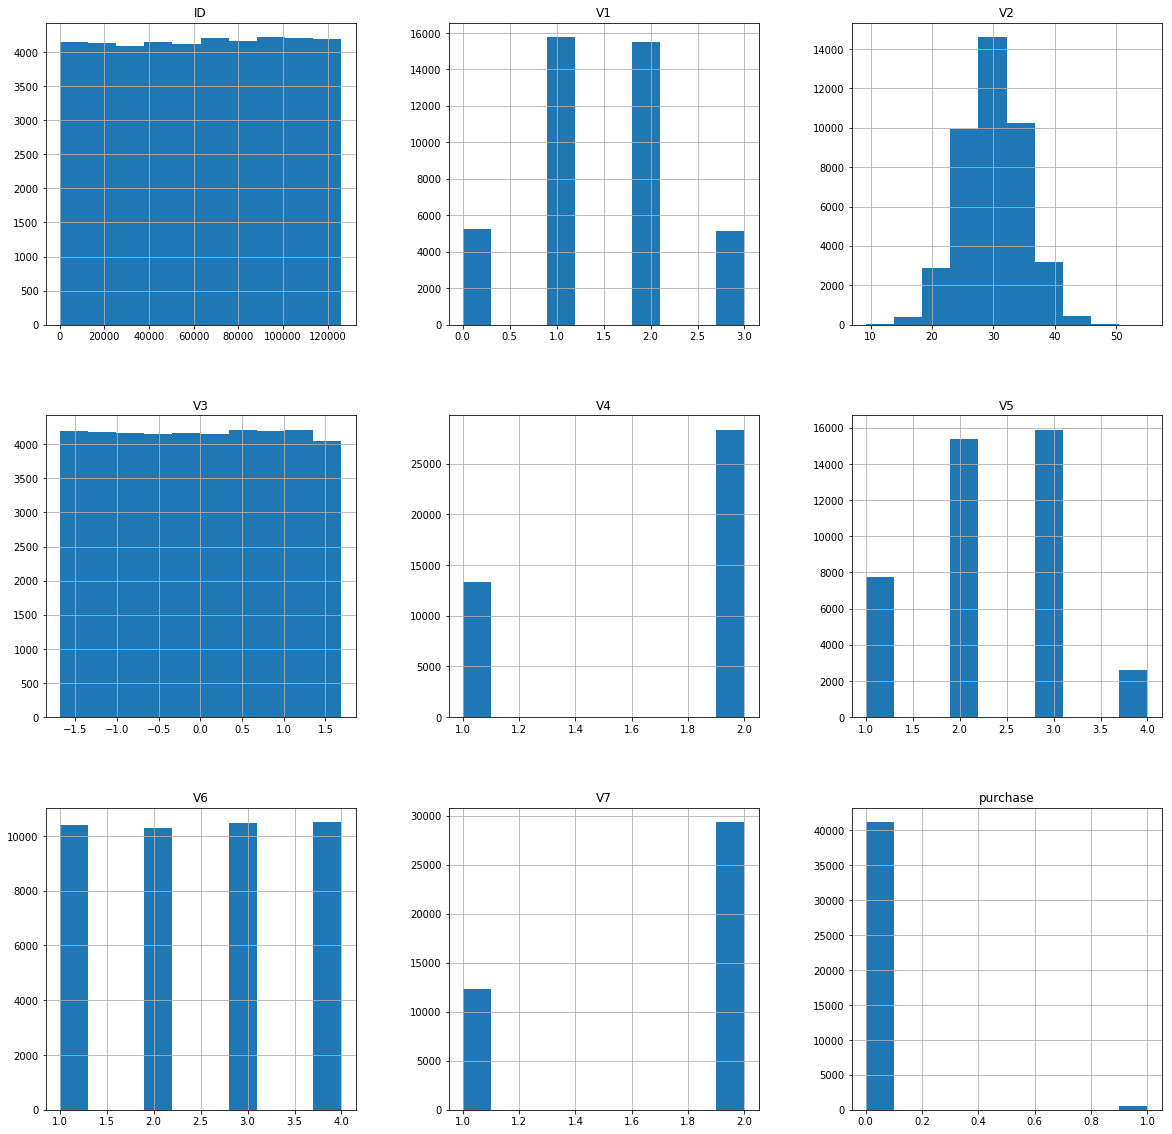

In [15]:
# 1.2 Lets look at Testing data distriutions for features
test_data.hist(figsize = (20,20))

In [16]:
# 1.3 lets see how many people were given promotion in training data
train_data['Promotion'].value_counts()

Yes    42364
No     42170
Name: Promotion, dtype: int64

In [17]:
# 1.4 lets see how many people were purchased the $10 product in training data
train_data['purchase'].value_counts()

0    83494
1     1040
Name: purchase, dtype: int64

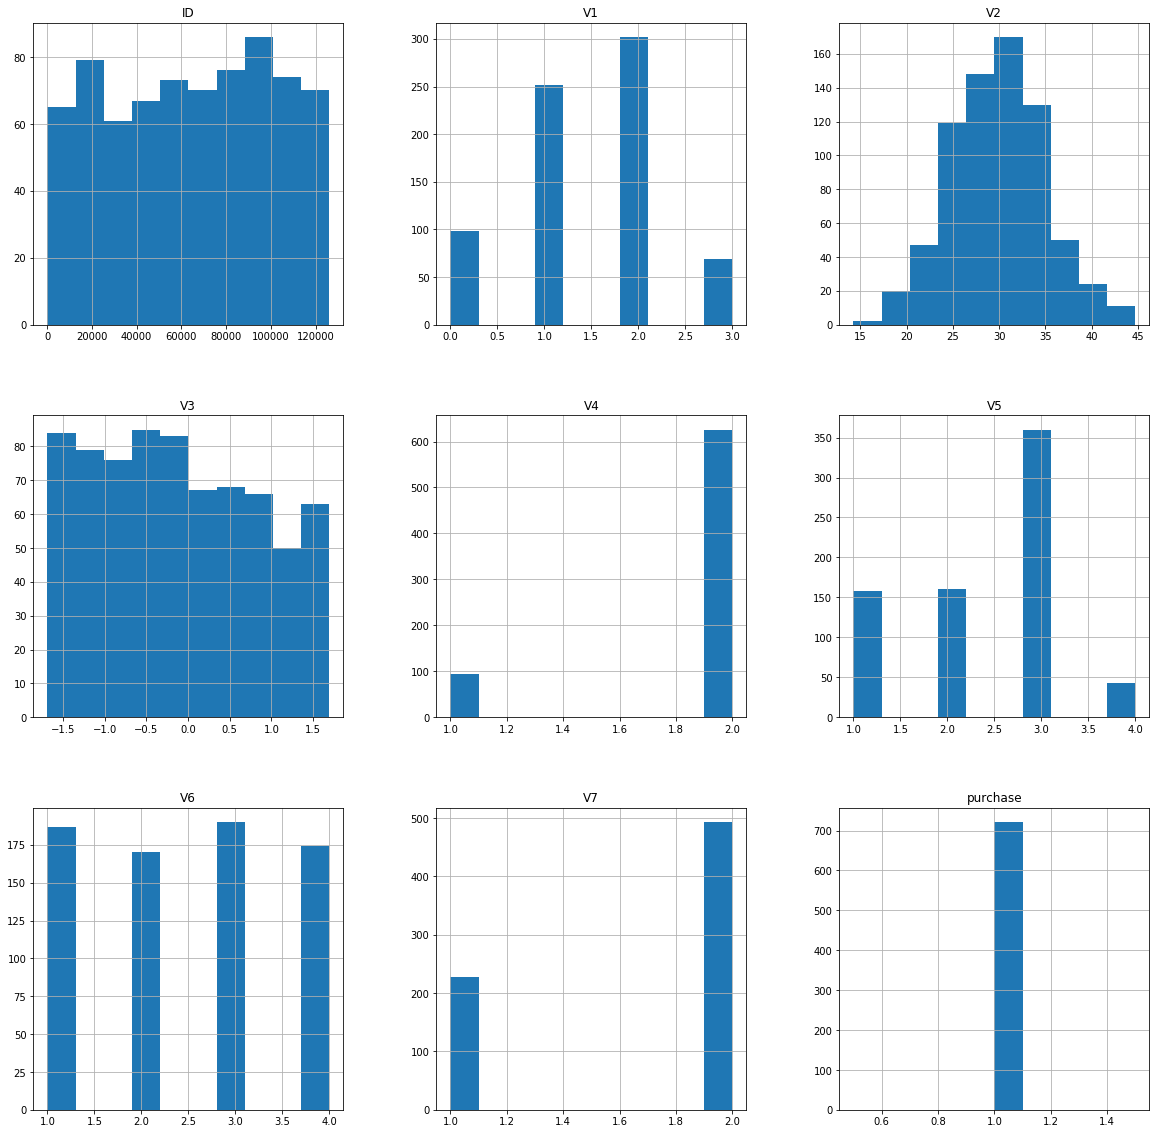

In [19]:
# 1.5 lets see how the data looks for people who were given promotion and purchased the product in training data.
train_data[(train_data['Promotion']=='Yes') & (train_data['purchase']==1)].hist(figsize=(20,20));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D8DB2B9E8>,
      dtype=object)

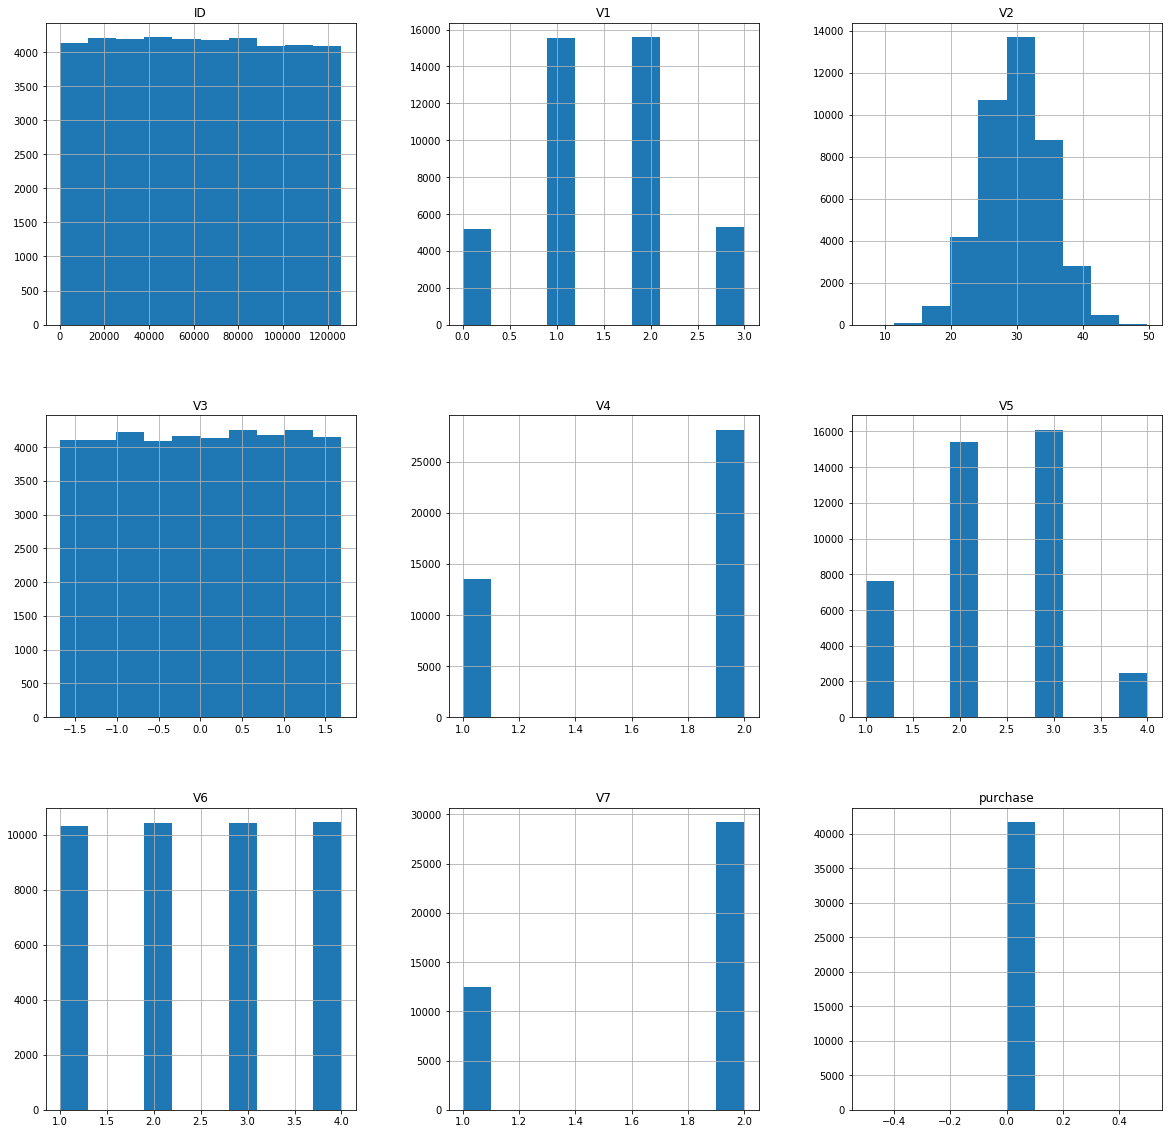

In [25]:
# 1.6 lets see how the data looks for people who were given promotion but did not purchase the product in training data.
train_data[(train_data['Promotion']=='Yes') & (train_data['purchase']==0)].hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D8DF1DD68>,
      dtype=object)

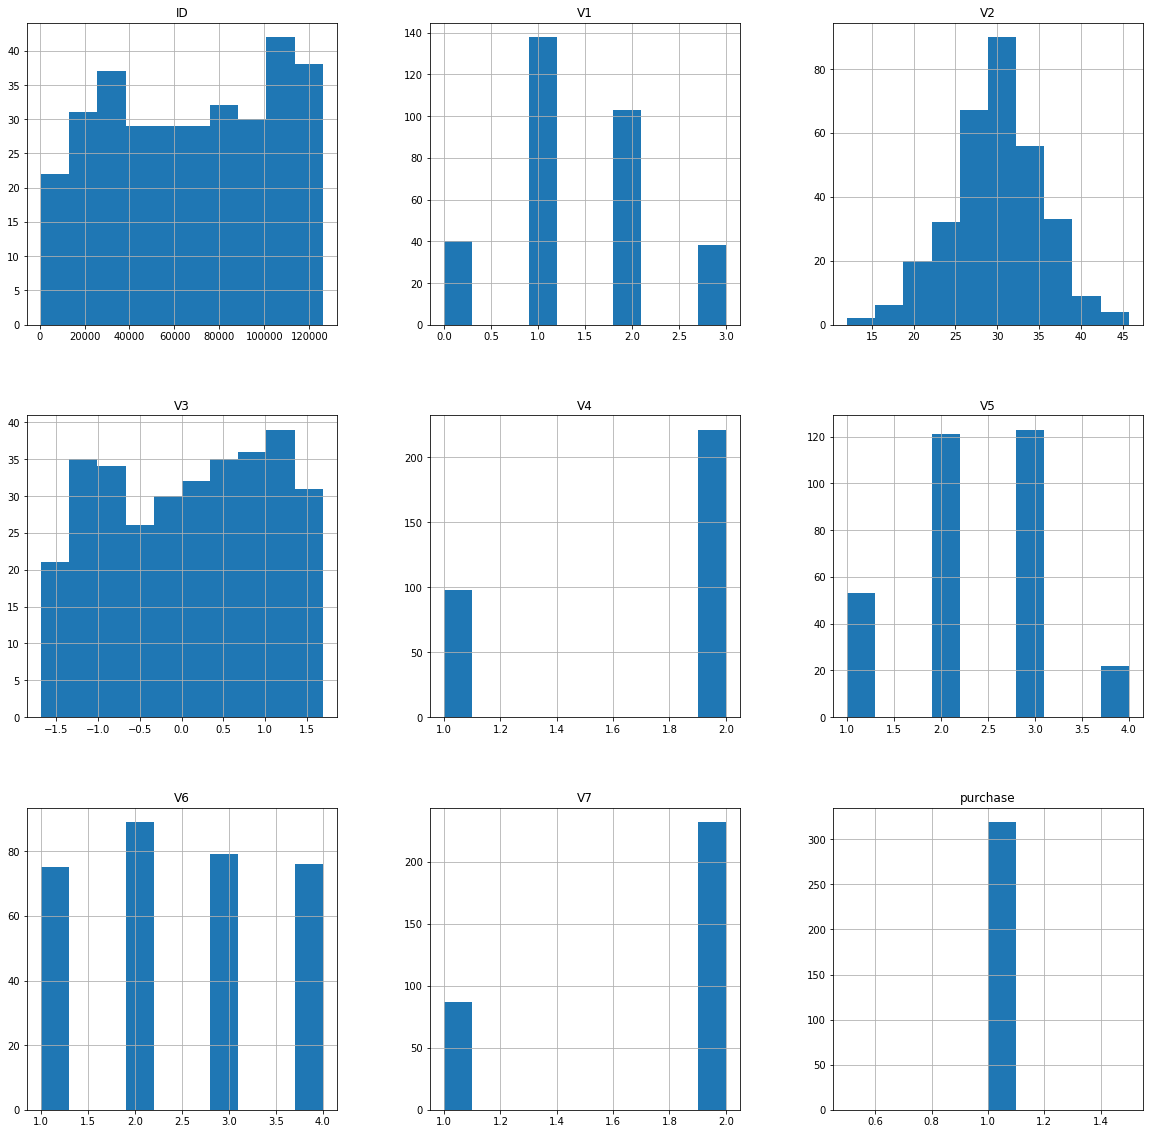

In [27]:
# 1.7 Lets see how the data looks for people who were not given the promotion but still purchased $10 product in training data
train_data[(train_data['Promotion']=='No') & (train_data['purchase']==1)].hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D8DF1DF98>,
      dtype=object)

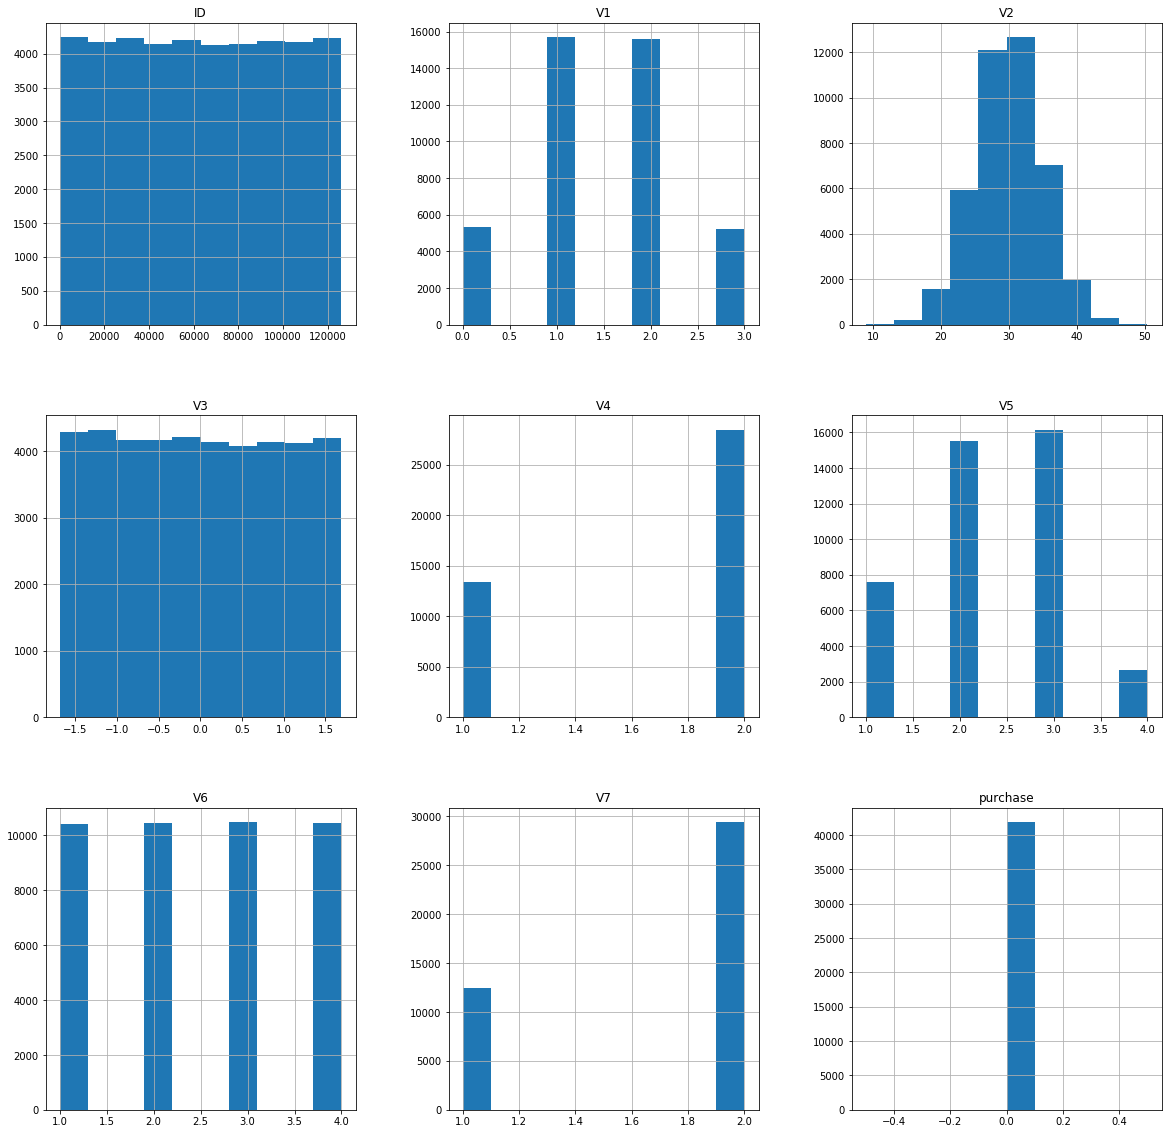

In [28]:
# 1.8 Lets see how the data looks for people who were not given the promotion and did not purchased $10 product in training data
train_data[(train_data['Promotion']=='No') & (train_data['purchase']==0)].hist(figsize=(20,20))

#### 2. MODELING:
Before modeling lets categorize the data:
1. People who got the promotion (1); but did not buy (0)
2. People who got the promotion (1); and bought (1)
3. People who did not get the promotion (0), and did not buy (0)
4. People who did not get the promotion (0), but bought anyway (1)

The goal of this study is to uderstand what features are responsible for influencing a persons decision to buy the new product. 
And once we know this, we would like to see if we can increase the likelyhood of them buying this new product if we give them a promotion. 
We can achieve this in the following manner:
- We can train two seperate models, one with datapoints that recieved the promotion (experiment group) and one with datapoints that did not receive the promotion (control group). The lables will be if they purchased the new product or not. 
- We will get two probabilities, and the difference in them will give us the likelihood of a person, not given the promotion, who would more likely buy the product, if given the promotion.

#### 2.1. Lets split the training data into control and experiment groups to model them seperately.

In [87]:
train_data.groupby('Promotion').count()

,ID,purchase,V1,V2,V3,V4,V5,V6,V7
Promotion,,,,,,,,,
No,42170,42170,42170,42170,42170,42170,42170,42170,42170
Yes,42364,42364,42364,42364,42364,42364,42364,42364,42364


In [90]:
# Lets get the data for control group
df_control = train_data[train_data['Promotion']=='No']

In [91]:
# Lets get the data for experiment group
df_experiment = train_data[train_data['Promotion']=='Yes']

In [92]:
print(df_control.shape)
print(df_experiment.shape)

(42170, 10)
(42364, 10)


#### 2.2. Control group classification modeling using Decision Trees

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [108]:
# getting features and response
X_control = df_control[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
y_control = df_control['purchase']

In [111]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split( X_control, y_control, test_size=0.33, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (28253, 7) (28253,)
Test set: (13917, 7) (13917,)


In [112]:
# fitting the model
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [124]:
yhat_test_control = decTree.predict(X_test)
yhat_test_cntrprob = decTree.predict_proba(X_test)

[Text(0, 0.5, 'Not Purchased'), Text(0, 1.5, 'Purchased')]

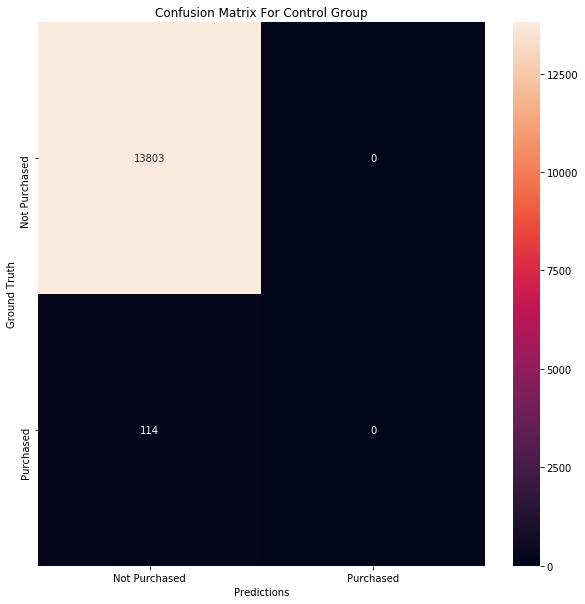

In [125]:
cm = confusion_matrix(y_test, yhat_test_control)
fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Ground Truth')
ax.set_title('Confusion Matrix For Control Group')
ax.xaxis.set_ticklabels(['Not Purchased', 'Purchased'])
ax.yaxis.set_ticklabels(['Not Purchased', 'Purchased'])

#### 2.3. Experiment group classification modeling using Decision Trees

In [121]:
#2.3. Experiment group classification modeling using Decision Trees
X_experiment = df_experiment[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
y_experiment = df_experiment['purchase']

In [122]:
# train, test split
X_trainex, X_testex, y_trainex, y_testex = train_test_split( X_experiment, y_experiment, test_size=0.33, random_state=40)
print ('Train set:', X_trainex.shape,  y_trainex.shape)
print ('Test set:', X_testex.shape,  y_testex.shape)

Train set: (28383, 7) (28383,)
Test set: (13981, 7) (13981,)


In [123]:
# fitting the model
decTree_ex = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree_ex.fit(X_trainex,y_trainex)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
yhat_test_experiment = decTree_ex.predict(X_testex)
yhat_test_exprob = decTree_ex.predict_proba(X_testex)

[Text(0, 0.5, 'Not Purchased'), Text(0, 1.5, 'Purchased')]

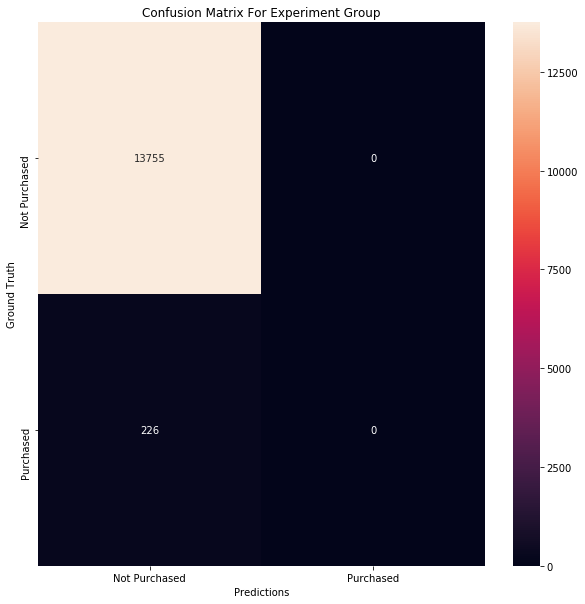

In [127]:
cm_ex = confusion_matrix(y_testex, yhat_test_experiment)
fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm_ex, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Ground Truth')
ax.set_title('Confusion Matrix For Experiment Group')
ax.xaxis.set_ticklabels(['Not Purchased', 'Purchased'])
ax.yaxis.set_ticklabels(['Not Purchased', 'Purchased'])

In [137]:
yhat_test_cntrprob.shape

(13917, 2)

In [138]:
yhat_test_exprob.shape

(13981, 2)

In [139]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    test = df
    yhat_test_cntrprob = decTree.predict_proba(test)
    yhat_test_exprob = decTree_ex.predict_proba(test)
    
    #get the difference in probabilities for predicting '1' -> purchase = 'Yes'
    diff = yhat_test_exprob[:,1] - yhat_test_cntrprob[:,1]
    
    #also define your treshold so only top 5 % get the promotion
    treshold = np.percentile(diff, 95)
    
    #create your promotion empty list to store values and return
    promotion = []
    
    for x in diff:
        if x > 0:
            if x > treshold:
                promotion.append('Yes')
        else:
            promotion.append('No')

    promotion = np.array(promotion) 
    
    return promotion

In [141]:
def score(df, promo_pred_col = 'Promotion'):
    n_treat       = df.loc[df[promo_pred_col] == 'Yes',:].shape[0]
    n_control     = df.loc[df[promo_pred_col] == 'No',:].shape[0]
    n_treat_purch = df.loc[df[promo_pred_col] == 'Yes', 'purchase'].sum()
    n_ctrl_purch  = df.loc[df[promo_pred_col] == 'No', 'purchase'].sum()
    irr = n_treat_purch / n_treat - n_ctrl_purch / n_control
    nir = 10 * n_treat_purch - 0.15 * n_treat - 10 * n_ctrl_purch
    return (irr, nir)
    

def test_results(promotion_strategy):
    test_data = pd.read_csv('Test.csv')
    df = test_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
    promos = promotion_strategy(df)
    score_df = test_data.iloc[np.where(promos == 'Yes')]    
    irr, nir = score(score_df)
    print("Nice job!  See how well your strategy worked on our test data below!")
    print()
    print('Your irr with this strategy is {:0.4f}.'.format(irr))
    print()
    print('Your nir with this strategy is {:0.2f}.'.format(nir))
    
    print("We came up with a model with an irr of {} and an nir of {} on the test set.\n\n How did you do?".format(0.0188, 189.45))
    return irr, nir

In [142]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0181.

Your nir with this strategy is 24.30.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.01809637198735138, 24.30000000000001)

This was just one example of achieving this. There are other ways to maximise the Metrics that can be explored with better modeling and GridSearch.